In [3]:
import math as ma
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [4]:
create_data=[]
for i in range(0,180,2):
    array=[]
    for j in range(0,200,2):
        x=50*ma.cos(ma.radians(i))+40*ma.cos(ma.radians(i+j))
        y=50*ma.sin(ma.radians(i))+40*ma.sin(ma.radians(i+j))
        array.append(np.array((i,j,x,y)))
    create_data.extend(array)
#create_data

In [5]:
header = ['alpha', 'beta', 'x', 'y']
with open('robot_2d.csv', 'w', encoding='UTF8', newline='') as data_table:
    viet = csv.writer(data_table)
    viet.writerow(header)
    viet.writerows(create_data)

In [6]:
data=pd.read_csv('robot_2d.csv')
data

,alpha,beta,x,y
0,0.0,0.0,90.000000,0.000000
1,0.0,2.0,89.975633,1.395980
2,0.0,4.0,89.902562,2.790259
3,0.0,6.0,89.780876,4.181139
4,0.0,8.0,89.610723,5.566924
...,...,...,...,...
8995,178.0,190.0,-10.358819,7.311899
8996,178.0,192.0,-10.577231,8.690902
8997,178.0,194.0,-10.843637,10.061442
8998,178.0,196.0,-11.157712,11.421851


In [7]:
x_data=np.array(data.drop(['alpha','beta'],axis=1))
y_data=np.array(data[['alpha','beta']])
x_data.shape

(9000, 2)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1)
x_train.shape

(8100, 2)

In [9]:
model=Sequential()
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2,  activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 11,402
Trainable params: 11,402
Non-traina

In [10]:
model.compile(loss='mse',optimizer=Adam(),metrics=['mean_absolute_error'])
history=model.fit(x_train,y_train,batch_size=200,epochs=1000,verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=30)]) 

Epoch 1/1000
33/33 [==============================] - 3s 12ms/step - loss: 10778.4990 - mean_absolute_error: 88.3769 - val_loss: 7976.0288 - val_mean_absolute_error: 69.4662
Epoch 2/1000
33/33 [==============================] - 0s 5ms/step - loss: 6455.9370 - mean_absolute_error: 59.7568 - val_loss: 5553.1475 - val_mean_absolute_error: 54.0666
Epoch 3/1000
33/33 [==============================] - 0s 5ms/step - loss: 5558.1660 - mean_absolute_error: 53.7499 - val_loss: 5341.5137 - val_mean_absolute_error: 52.0664
Epoch 4/1000
33/33 [==============================] - 0s 5ms/step - loss: 5414.4912 - mean_absolute_error: 52.6904 - val_loss: 5261.5449 - val_mean_absolute_error: 52.0633
Epoch 5/1000
33/33 [==============================] - 0s 6ms/step - loss: 5302.2202 - mean_absolute_error: 52.1696 - val_loss: 5136.6421 - val_mean_absolute_error: 51.2555
Epoch 6/1000
33/33 [==============================] - 0s 6ms/step - loss: 5178.3721 - mean_absolute_error: 51.5855 - val_loss: 5009.3813 -

In [11]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test mae:',score[1])

Test loss: 81.19371032714844
Test mae: 3.941397190093994


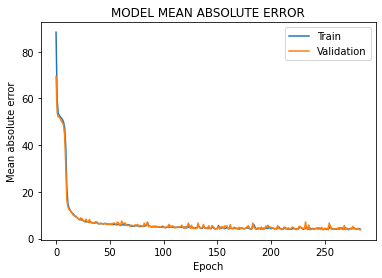

In [12]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()